In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
# import numpy as np

In [2]:
X = torch.tensor([[i for i in range(100)] for _ in range(1000)])
print(X.shape)
y = (torch.sin(X) + .3*torch.randn(1000,100))


torch.Size([1000, 100])


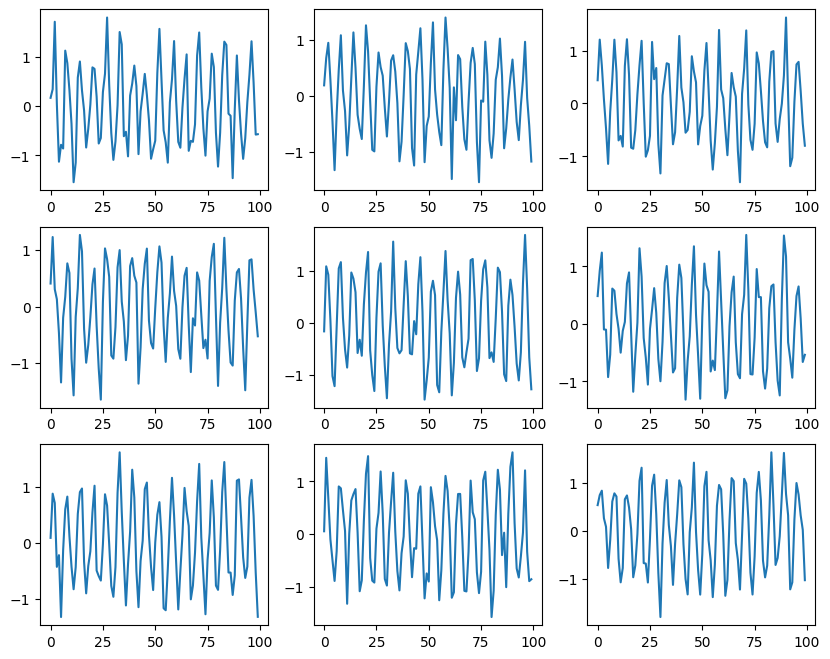

In [3]:
fig = plt.figure(figsize=(10,8))
for i,x in enumerate(X[:9]):
    ax = fig.add_subplot(3,3,i+1)
    ax.plot(x,y[i])

In [4]:
class LSTM(nn.Module):
    def __init__(self):
        super(LSTM, self).__init__()
        self.l1 = nn.RNN(1, 51, dtype=torch.double)
        self.l2 = nn.LSTMCell(51, 51, dtype=torch.double)
        self.l3 = nn.Linear(51, 1, dtype=torch.double)
        self.h_t = torch.zeros(1, 51, dtype=torch.double)
        self.c_t = torch.zeros(1, 51, dtype=torch.double)
        self.h_t2 = torch.zeros(51, 51, dtype=torch.double)
        self.c_t2 = torch.zeros(51, 51, dtype=torch.double)
        
        

    def forward(self, x):
        h_t = self.h_t 
        c_t = self.c_t 
        h_t2 = self.h_t2
        c_t2 = self.c_t2
        x = x.view(-1, x.size(1))
        
        h_t, c_t = self.l1(x, (h_t, c_t))
        h_t2, c_t2 = self.l2(h_t, (h_t2, c_t2))
        output = self.l3(h_t2)
        
        
        
        return output


In [5]:
lstm = LSTM()
inp = torch.tensor([0], dtype=torch.double).view(1,1,1)
print(inp.dtype)
lstm(torch.tensor([0]).unsqueeze(0))

# lstm(torch.tensor([0], dtype=torch.float))

torch.float64


AttributeError: 'tuple' object has no attribute 'dim'